# Amazon Fine Food Reviews Analysis¶ 

Data Source: **https://www.kaggle.com/snap/amazon-fine-food-reviews**

**The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.**

Number of reviews: 568,454

Number of users: 256,059

Number of products: 74,258

Timespan: Oct 1999 - Oct 2012

Number of Attributes/Columns in data: 10

Attribute Information:

Id
ProductId - unique identifier for the product

UserId - unqiue identifier for the user

ProfileName

HelpfulnessNumerator - number of users who found the review helpful

HelpfulnessDenominator - number of users who indicated whether they found the 
review helpful or not

Score - rating between 1 and 5

Time - timestamp for the review

Summary - brief summary of the review


Text - text of the review

Objective:- Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).


**[Q] How to determine if a review is positive or negative?** 

[Ans] We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.

**[1.1] Loading the data **

**The dataset is available in two forms**

.csv file

SQLite Database

In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. 

If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [7]:
#read data
con=sqlite3.connect('/content/drive/MyDrive/amazon data/database.sqlite')

In [8]:
#Neglect review where score=3
filtered_data=pd.read_sql_query('SELECT * FROM Reviews WHERE Score!=3',con)
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
def partition(x):
  if x<3:
    return 'negetive'
  return 'positive'

In [10]:
filtered_data['Score']=filtered_data['Score'].map(partition)

In [11]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negetive,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negetive,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
filtered_data['Score'].value_counts()

positive    443777
negetive     82037
Name: Score, dtype: int64

In [13]:
display=pd.read_sql_query('''SELECT * FROM Reviews WHERE Score!=3 AND UserId="AR5J8UI46CURR"
                            ORDER BY ProductID''',con)

In [14]:
display.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


*Observations: *

1) As in above table, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator.Score,Time, Summary and Text shows same content

2) Also for all 5 product, shows same time.

3) Here we observed that, product is same, only the flavour is different

4) so we will remove this duplication and keep any one product which all these features so we removing duplicates.

In [15]:
#sort data according to product id in ascending order
sorted_data=filtered_data.sort_values('ProductId',ascending=True,inplace=False,kind='quicksort',na_position='last')

In [16]:
final=sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},keep='first',inplace=False)


In [17]:
final.shape

(364173, 10)

In [18]:
# % of data remains after removing duplicates
((final['Id'].size)/(filtered_data['Id'].size))*100

69.25890143662969

In [19]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [20]:
final.shape

(364171, 10)

## **Now Processing like Removal of stopwords ,html tags and make all letters in lower case**

In [21]:
import re
i=0
for sent in final['Text'].values:
  if (re.findall('<.*?>',sent)):
    print(i)
    print(sent)
    break
  i+=1

6
I set aside at least an hour each day to read to my son (3 y/o). At this point, I consider myself a connoisseur of children's books and this is one of the best. Santa Clause put this under the tree. Since then, we've read it perpetually and he loves it.<br /><br />First, this book taught him the months of the year.<br /><br />Second, it's a pleasure to read. Well suited to 1.5 y/o old to 4+.<br /><br />Very few children's books are worth owning. Most should be borrowed from the library. This book, however, deserves a permanent spot on your shelf. Sendak's best.


In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
stop=set(stopwords.words('english'))
sno=nltk.stem.SnowballStemmer('english')

In [25]:
#funtion to clean html tages

def cleanhtml(sentence):
  cleanr=re.compile('<.*?')
  cleanedtext=re.sub(cleanr,'',sentence)
  return cleanedtext

#function to clean punctuations

def cleanpunc(sentence):
  cleaned=re.sub(r'[?|!|\'|"|#]',r'',sentence)
  cleaned=re.sub(r'[.|,|(|)|\|/]',r'',sentence)
  return cleaned

In [26]:
print(sno.stem('tasty'))
print(stop)


tasti
{'above', 'do', 'in', "shan't", 'into', 'himself', 'mustn', 'wouldn', 'them', 'why', 'an', 'when', 'hasn', 'we', 'while', "that'll", 'off', 'couldn', 't', 'll', 'yourself', "wouldn't", 'me', 'after', 'through', 'will', 'herself', 'should', 'weren', "didn't", 'didn', 'on', 'most', 'be', 's', "couldn't", 'to', 'here', 'she', 'so', 'its', 'myself', 'hadn', 'if', 've', 'm', 'further', 're', 'any', 'were', 'you', "you've", 'what', 'as', 'at', 'before', 'him', 'been', 'their', 'itself', 'too', 'ain', "mustn't", 'are', 'ourselves', 'his', 'against', 'by', 'did', 'how', 'about', 'those', 'hers', 'once', 'over', "weren't", 'd', 'these', 'some', "should've", 'has', 'doing', "won't", 'her', 'all', 'yourselves', "hadn't", 'up', "she's", 'it', 'until', 'they', 'very', 'of', 'same', "haven't", 'having', "aren't", 'because', 'each', 'themselves', "hasn't", 'does', 'few', 'am', 'being', "mightn't", 'can', 'wasn', 'is', 'under', 'aren', 'who', 'below', "doesn't", 'ma', 'just', 'i', 'and', 'don', 

In [27]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.

i=0
final_string=[]
positive_words=[]
negetive_words=[]
s=''
str1=''

for sent in final['Text'].values:
  filtered_string=[]
  sent=cleanhtml(sent)
  for w in sent.split():
    for cleanword in cleanpunc(w).split():
      if ((cleanword.isalpha()) & (len(cleanword)>2)):
        if (cleanword.islower() not in stop):
          s=(sno.stem(cleanword.lower()))
          filtered_string.append(s)
        if (final['Score'].values)[i]=='positive':
          positive_words.append(s)
        if (final['Score'].values)[i]=='negetive':
          negetive_words.append(s)

        else:
          continue
      else:
        continue
  str1=' '.join(filtered_string)
  final_string.append(str1)
  i+=1

In [28]:
final['CleanText']=final_string

In [29]:
final.shape

(364171, 11)

In [30]:
final['Time']=pd.to_datetime(final['Time'],unit='s')


In [31]:
final_p=final[final['Score']=='positive'].sample(n=5000)
final_n=final[final['Score']=='negetive'].sample(n=5000)
final=pd.concat([final_p,final_n])

In [32]:
! pip install scikit-plot

In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score,hamming_loss,roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve


In [34]:
X=final['CleanText']
y=final['Score']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)
X_tr,X_cv,y_tr,y_cv=train_test_split(X_train,y_train, test_size=0.33,random_state=0)

In [36]:
print('X_train, Y_train', X_train.shape, y_train.shape)
print('X_test, Y_test', X_test.shape, y_test.shape)
print('X_tr, Y_tr', X_tr.shape, y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, y_cv.shape)

X_train, Y_train (6700,) (6700,)
X_test, Y_test (3300,) (3300,)
X_tr, Y_tr (4489,) (4489,)
X_cv, Y_cv (2211,) (2211,)


## **Training Model  for Random Forest Classifier**

In [37]:
import seaborn as sns
import scikitplot.metrics as skplt
from sklearn.ensemble import RandomForestClassifier
#Randomforest classifier

def Rf_classifier(X_tr,X_cv,y_tr,y_cv):
  pred_cv=[]
  pred_train=[]
  depths=[2,3,5,8,10,20]
  estimators=[100,200,300,400,500]
  for i in depths:
    for j in estimators:
      clf=RandomForestClassifier(n_estimators=j,max_depth=i,n_jobs=-1,class_weight='balanced')
      clf.fit(X_tr,y_tr)
      probs=clf.predict_proba(X_cv)[:,1]
      prob=clf.predict_proba(X_tr)[:,1]
      auc_score_cv=roc_auc_score(y_cv,probs)
      auc_score_train=roc_auc_score(y_tr,prob)
      pred_cv.append(auc_score_cv)
      pred_train.append(auc_score_train)

  cmap=sns.light_palette('green')
  print('_'*30 ,'Auc score on Train data','_'*30)
  pred_train=np.array(pred_train)
  pred_train=pred_train.reshape(len(depths),len(estimators))
  plt.figure(figsize=(10,5))
  sns.heatmap(pred_train,annot=True,fmt='.3f',xticklabels=estimators,yticklabels=depths)
  plt.xlabel('estimators')
  plt.ylabel('depth')
  plt.show()

  cmap=sns.light_palette('green')
  print('_'*30 ,'Auc score for cv data','_'*30)
  pred_cv=np.array(pred_cv)
  pred_cv=pred_cv.reshape(len(depths),len(estimators))
  plt.figure(figsize=(10,5))
  sns.heatmap(pred_cv,annot=True,fmt='.3f',xticklabels=estimators,yticklabels=depths)
  plt.xlabel('estimators')
  plt.ylabel('depths')
  plt.show()

## **Testing model on Train data and test data for Random Forest**

In [38]:
import sklearn.metrics as metrics
def testing_rf(X_train,y_train,X_test,y_test,optimal_estimator,optimal_depth):
  clf=RandomForestClassifier(n_estimators=optimal_estimator,max_depth=optimal_depth,class_weight='balanced')
  clf.fit(X_train,y_train)
  pred=clf.predict(X_test)
  pred1=clf.predict(X_train)
  probs=clf.predict_proba(X_test)[:,1]
  prob=clf.predict_proba(X_train)[:,1]
  print('Auc sore for test data',roc_auc_score(y_test,probs))
  print('Auc score for train data',roc_auc_score(y_train,prob))

  #calculate roc_curve
  fpr,tpr,threshold=roc_curve(y_test,probs,pos_label='positive')
  fpr1,tpr1,thrshold1=roc_curve(y_train,prob,pos_label='positive')

  #plot with no skill

  plt.plot([0,1],[0,1],linestyle='--')

  #plot roc_curve for the model

  plt.plot(fpr,tpr,marker='.',color='b',label='Test data')
  plt.plot(fpr1,tpr1,marker='.',color='r',label='train data')
  plt.title('Roc curve on Train and test data')
  plt.legend(loc='best')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.show()
  #Classification report and hamming loss

  print('hamming loss for train data',metrics.hamming_loss(y_train,pred1))
  print('hamming loss for test data',metrics.hamming_loss(y_test,pred))

  print('Classfication report on Train data',metrics.classification_report(y_train,pred1))
  print('Classfication report on Test data',metrics.classification_report(y_test,pred))

  skplt.plot_confusion_matrix(y_train,pred1,title='confusion matrix on Train data')
  skplt.plot_confusion_matrix(y_test,pred,title='confusion matrix on test data')


## **Top 20 Features**

In [39]:

#Code Reference:https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers
#Code Reference:https://stackoverflow.com/questions/45588724/generating-word-cloud-for-items-in-a-list-in-python
from wordcloud import WordCloud
def imp_feature(vectorizer,classifier, n =20):
    features = []
    feature_names = vectorizer.get_feature_names()
    coefs = sorted(zip(classifier.feature_importances_, feature_names))
    top = coefs[:-(n + 1):-1]
    print('\033[1m' + "feature_importances\tfeatures" + '\033[0m')
    print("="*35)
    for (coef1, feat1) in top:
        print("%.4f\t\t\t%-15s" % (coef1, feat1))
        features.append(feat1)
    wordcloud = WordCloud(background_color='black',width=1600,height=800).generate(" ".join(features))    #top 20 features in word cloud
    fig = plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    #fig.savefig("features.png")
    plt.show()

## **Techniques of Vectorization**

## **Bag Of Words**

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer()
bow_train=count_vec.fit_transform(X_tr)
bow_cv=count_vec.transform(X_cv)
bow_test=count_vec.transform(X_test)

print('train data size',bow_train.get_shape())
print('test data size',bow_test.get_shape())

train data size (4489, 10910)
test data size (3300, 10910)


In [41]:
print('Type of count vectorizer',type(bow_train))

Type of count vectorizer <class 'scipy.sparse.csr.csr_matrix'>


In [42]:
#normalize data

from sklearn.preprocessing import StandardScaler 
sc=StandardScaler(with_mean=False)
bow_train=sc.fit_transform(bow_train)
bow_cv=sc.transform(bow_cv)
bow_test=sc.transform(bow_test)
print('The shape of Train data',bow_train.shape)
print('the shape of test dta',bow_test.shape)
print('The shape of cv data',bow_cv.shape)

The shape of Train data (4489, 10910)
the shape of test dta (3300, 10910)
The shape of cv data (2211, 10910)


## **Training Random Forest on BOW**

______________________________ Auc score on Train data ______________________________


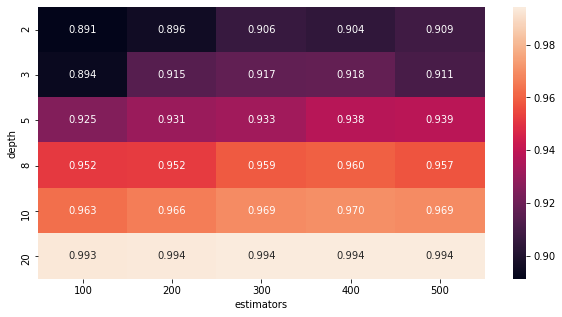

______________________________ Auc score for cv data ______________________________


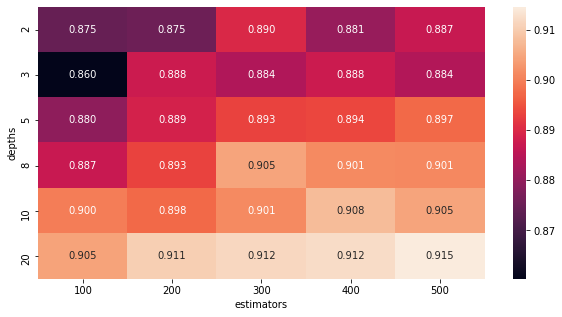

In [43]:
Rf_classifier(bow_train,bow_cv,y_tr,y_cv)

Auc sore for test data 0.8997554042294976
Auc score for train data 0.9934729236171941


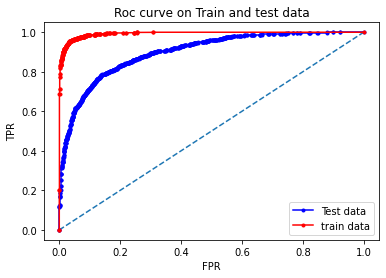

hamming loss for train data 0.04923145466696369
hamming loss for test data 0.18575757575757576
Classfication report on Train data               precision    recall  f1-score   support

    negetive       0.98      0.93      0.95      2276
    positive       0.93      0.98      0.95      2213

    accuracy                           0.95      4489
   macro avg       0.95      0.95      0.95      4489
weighted avg       0.95      0.95      0.95      4489

Classfication report on Test data               precision    recall  f1-score   support

    negetive       0.82      0.81      0.81      1643
    positive       0.81      0.82      0.82      1657

    accuracy                           0.81      3300
   macro avg       0.81      0.81      0.81      3300
weighted avg       0.81      0.81      0.81      3300



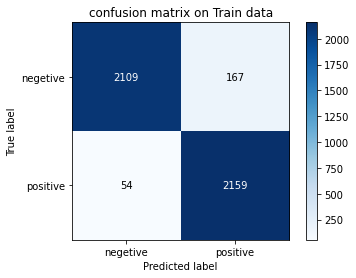

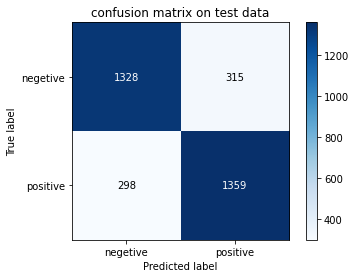

In [44]:
testing_rf(bow_train,y_tr,bow_test,y_test,optimal_estimator=200,optimal_depth=20)

feature_importances	features
0.0243			great          
0.0238			love           
0.0215			not            
0.0144			was            
0.0131			disappoint     
0.0119			best           
0.0105			bad            
0.0085			money          
0.0077			delici         
0.0076			easi           
0.0075			return         
0.0072			the            
0.0064			product        
0.0062			wast           
0.0060			find           
0.0056			hope           
0.0056			review         
0.0055			perfect        
0.0053			had            
0.0051			tast           


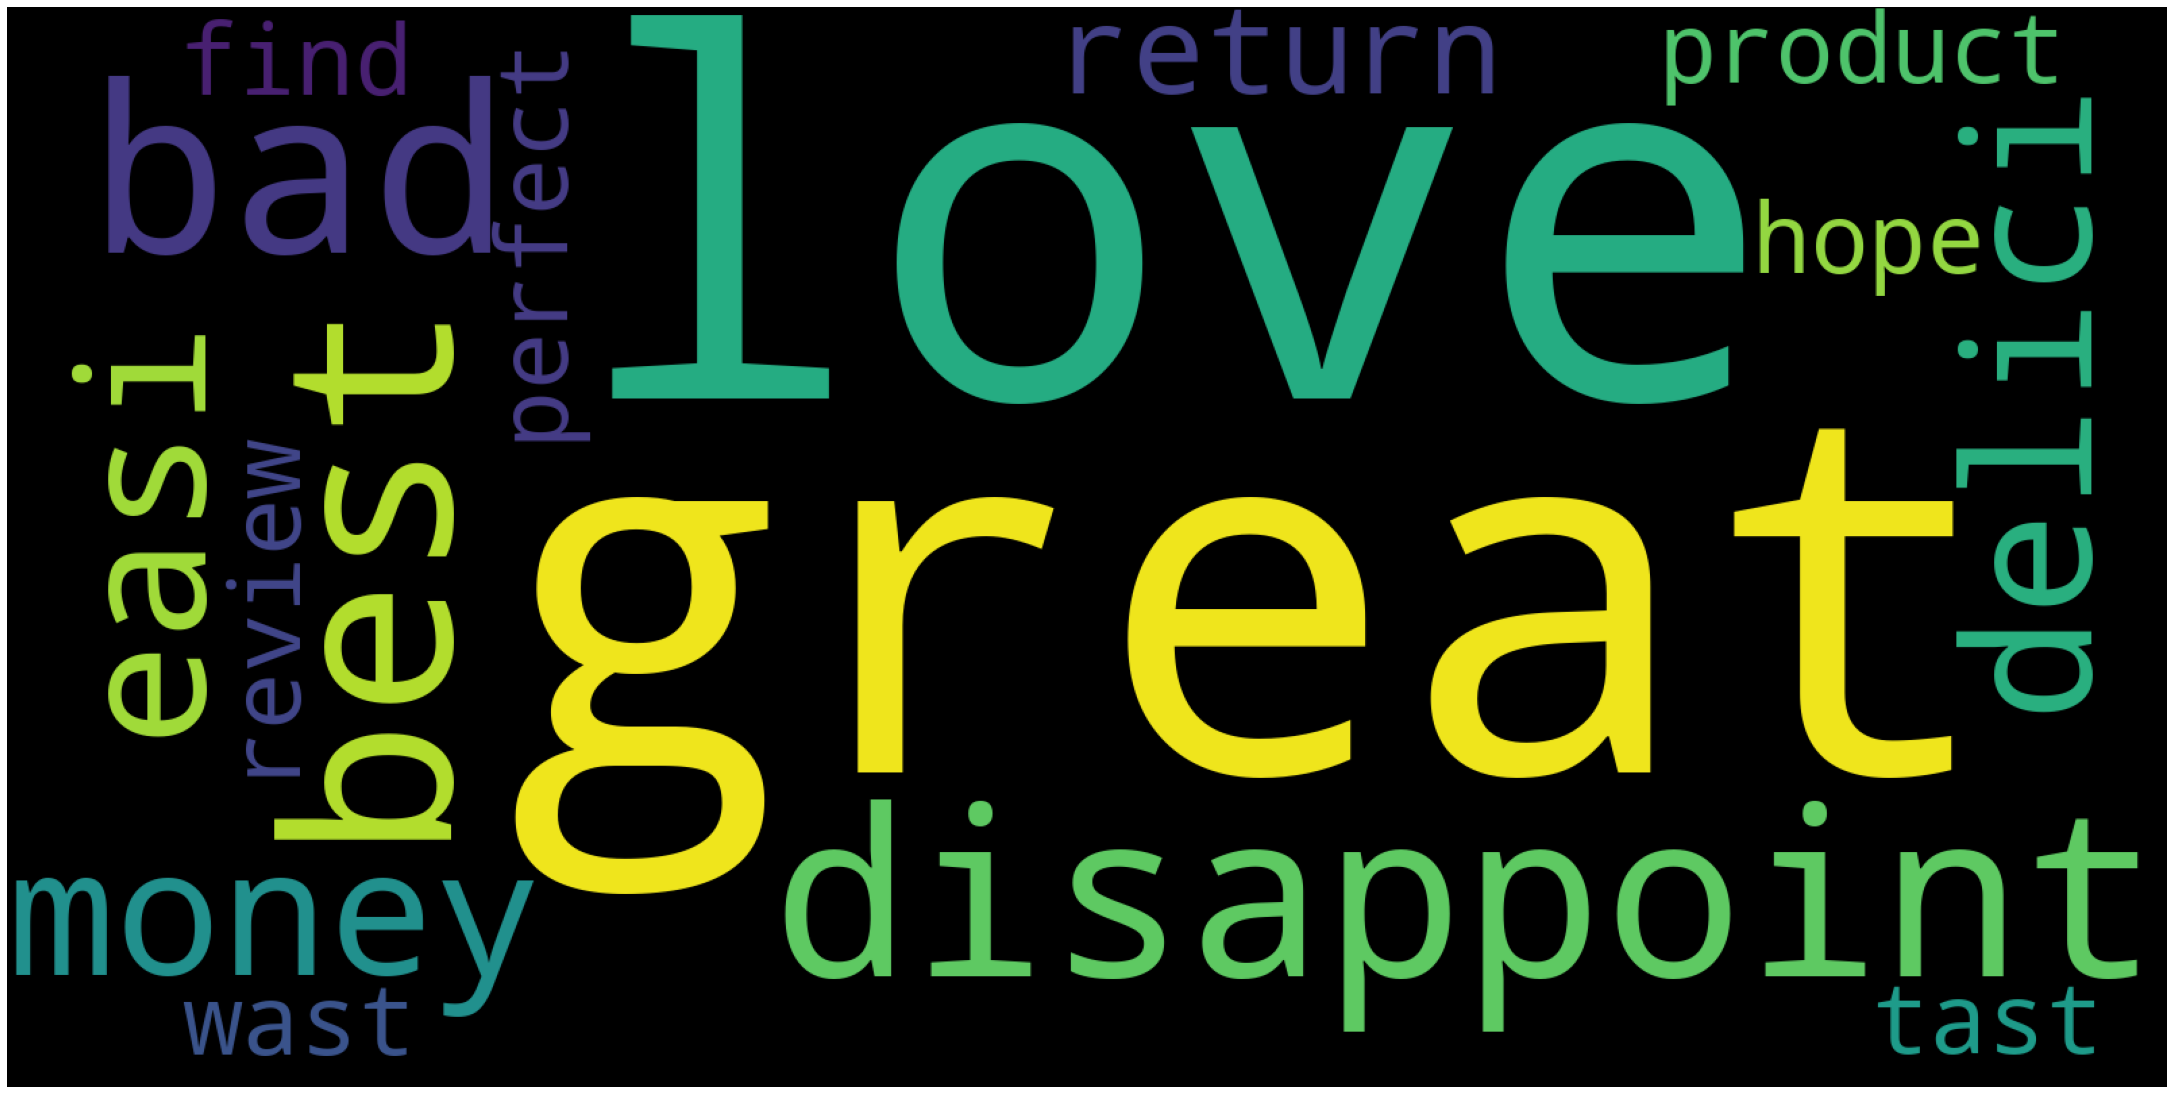

In [45]:
clf=RandomForestClassifier(max_depth=20,n_estimators=200,class_weight='balanced')
clf.fit(bow_train,y_tr)
features=imp_feature(count_vec,clf)

## **TF-IDF on RandomForest**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer(ngram_range=(1,2))
tf_train=tfidf_vec.fit_transform(X_tr)
tf_cv=tfidf_vec.transform(X_cv)
tf_test=tfidf_vec.transform(X_test)
print('The type of Count Vectorizer',type(bow_train))
print('Shape of train data',tf_train.get_shape())
print('shape of test data',tf_test.get_shape())
print('shape of cv data,',tf_cv.get_shape())

The type of Count Vectorizer <class 'scipy.sparse.csr.csr_matrix'>
Shape of train data (4489, 132556)
shape of test data (3300, 132556)
shape of cv data, (2211, 132556)


In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=False)
tf_train=sc.fit_transform(tf_train)
tf_cv=sc.transform(tf_cv)
tf_test=sc.transform(tf_test)

## **Training Tf-idf For Random Forest**

______________________________ Auc score on Train data ______________________________


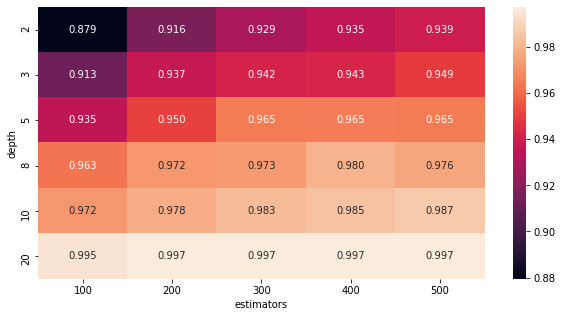

______________________________ Auc score for cv data ______________________________


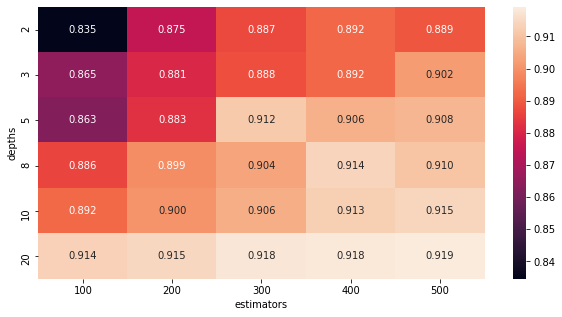

In [48]:
Rf_classifier(tf_train,tf_cv,y_tr,y_cv)

Auc sore for test data 0.9058172213200532
Auc score for train data 0.9974732905176872


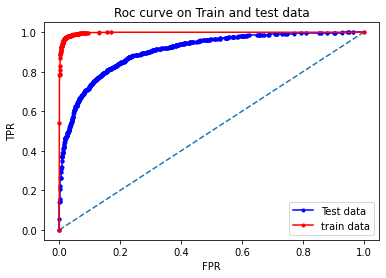

hamming loss for train data 0.03230118066384496
hamming loss for test data 0.17727272727272728
Classfication report on Train data               precision    recall  f1-score   support

    negetive       0.99      0.95      0.97      2276
    positive       0.95      0.99      0.97      2213

    accuracy                           0.97      4489
   macro avg       0.97      0.97      0.97      4489
weighted avg       0.97      0.97      0.97      4489

Classfication report on Test data               precision    recall  f1-score   support

    negetive       0.83      0.81      0.82      1643
    positive       0.81      0.84      0.83      1657

    accuracy                           0.82      3300
   macro avg       0.82      0.82      0.82      3300
weighted avg       0.82      0.82      0.82      3300



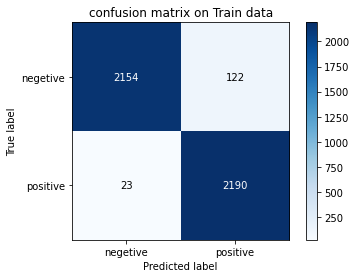

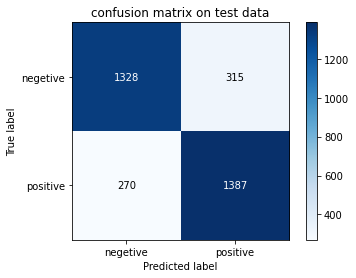

In [49]:
testing_rf(tf_train,y_tr,tf_test,y_test,optimal_estimator=300,optimal_depth=20)

# Top 20 features in TF-IDF for Random Forest


feature_importances	features
0.0134			love           
0.0116			great          
0.0086			disappoint     
0.0083			best           
0.0079			was            
0.0076			the best       
0.0074			not            
0.0064			easi           
0.0062			money          
0.0056			delici         
0.0054			product        
0.0048			the            
0.0046			return         
0.0042			love this      
0.0041			will not       
0.0040			bad            
0.0039			did not        
0.0036			high recommend 
0.0035			review         
0.0034			tast           


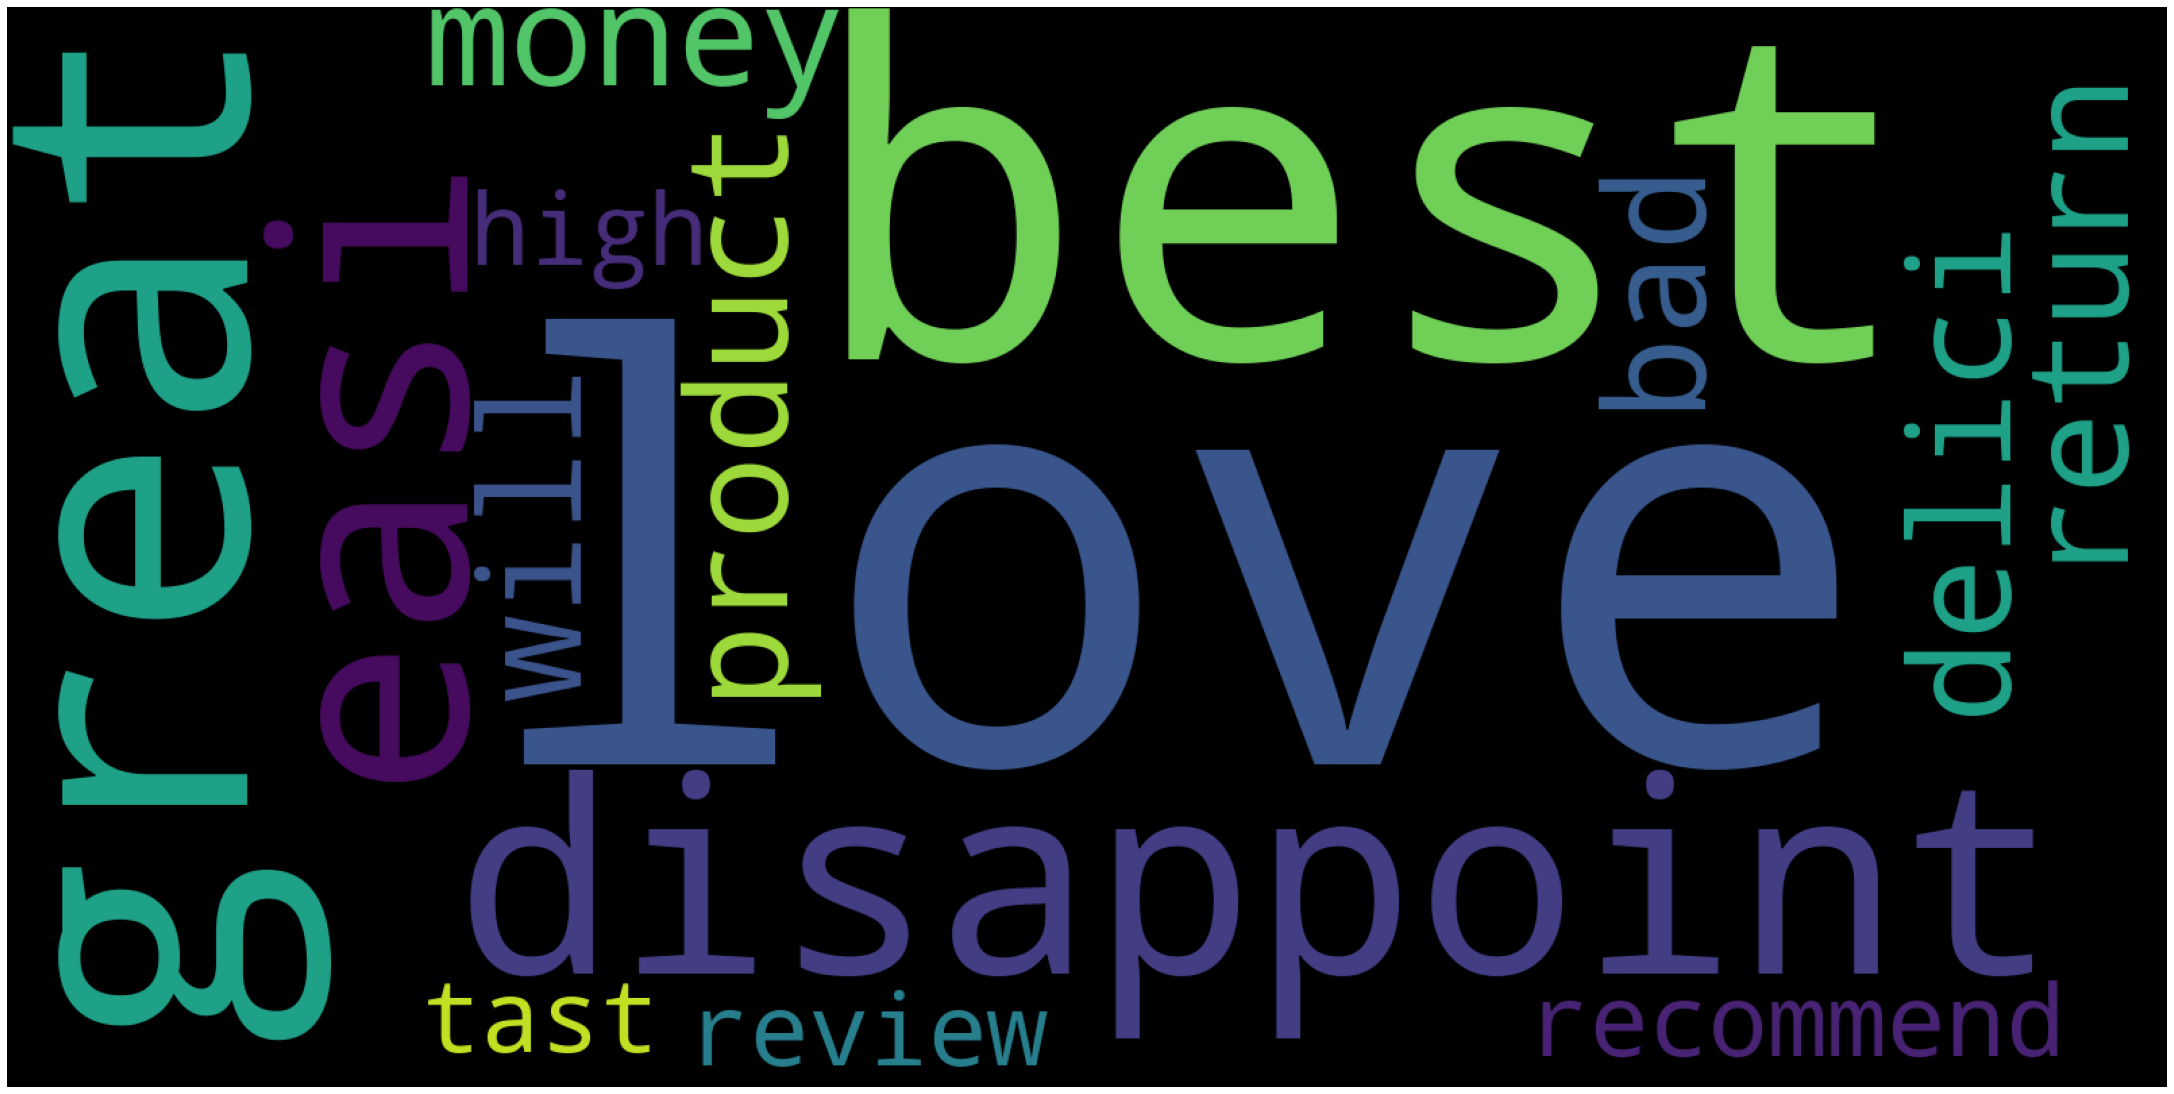

In [50]:
clf=RandomForestClassifier(n_estimators=300,max_depth=20,class_weight='balanced')
clf.fit(tf_train,y_tr)
imp_feature(tfidf_vec,clf)

# W2V**

In [51]:
list_of_train_sent=[]

for sent in X_tr.values:
  filtered_sentence=[]
  sent=cleanhtml(sent)
  for w in sent.split():
    for cleanword in cleanpunc(w).split():
      if (cleanword.isalpha()):
        filtered_sentence.append(cleanword.lower())
      else:
        continue
  list_of_train_sent.append(filtered_sentence)

In [52]:
list_of_cv_sent=[]

for sent in X_cv.values:
  filtered_sentence=[]
  sent=cleanhtml(sent)
  for w in sent.split():
    for cleanword in cleanpunc(w).split():
      if (cleanword.isalpha()):
        filtered_sentence.append(cleanword.lower())
      else:
        continue
  list_of_cv_sent.append(filtered_sentence)
  

In [53]:
list_of_test_sent=[]

for sent in X_test.values:
  filtered_sentence=[]
  sent=cleanhtml(sent)
  for w in sent.split():
    for cleanword in cleanpunc(w).split():

      if (cleanword.isalpha()):
        filtered_sentence.append(cleanword.lower())
      else:
        continue
  list_of_test_sent.append(filtered_sentence)
        

In [54]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_train_sent,min_count=5,size=50,workers=4)
w2v_words=list(w2v_model.wv.vocab)

# **AVG W2V**

In [55]:
def avg_w2v(list_of_sent):
    sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in list_of_sent: # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)        
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors

In [56]:
avgw2v_train=avg_w2v(list_of_train_sent)

4489
50


In [57]:
print(len(avgw2v_train[0]))
len(avgw2v_train)


50


4489

In [58]:
avgw2v_cv= avg_w2v(list_of_cv_sent)

2211
50


In [59]:
avgw2v_test=avg_w2v(list_of_test_sent)

3300
50


In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
avgw2v_train=sc.fit_transform(avgw2v_train)
avgw2v_cv=sc.transform(avgw2v_cv)
avgw2v_test=sc.transform(avgw2v_test)

______________________________ Auc score on Train data ______________________________


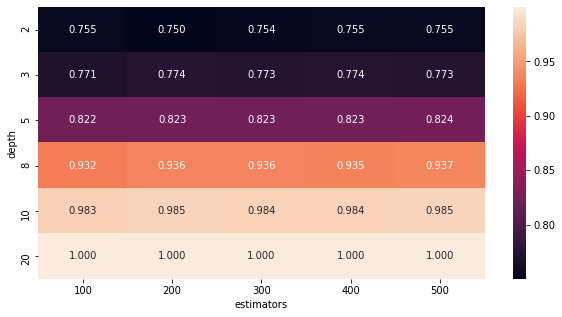

______________________________ Auc score for cv data ______________________________


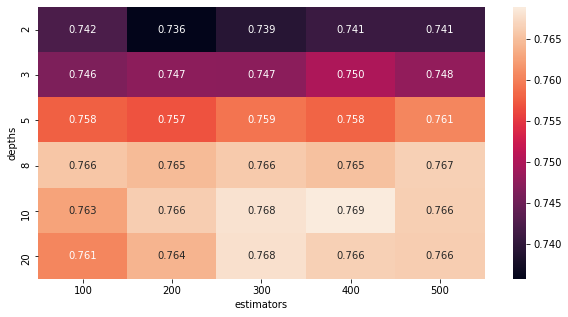

In [61]:
Rf_classifier(avgw2v_train,avgw2v_cv,y_tr,y_cv)

Auc sore for test data 0.7649540799816048
Auc score for train data 0.9847941783533474


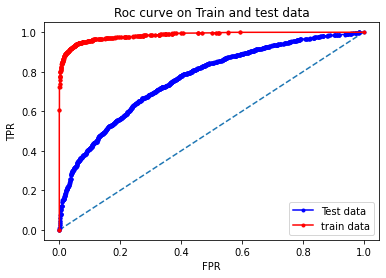

hamming loss for train data 0.06081532635330809
hamming loss for test data 0.3057575757575758
Classfication report on Train data               precision    recall  f1-score   support

    negetive       0.92      0.96      0.94      2276
    positive       0.96      0.91      0.94      2213

    accuracy                           0.94      4489
   macro avg       0.94      0.94      0.94      4489
weighted avg       0.94      0.94      0.94      4489

Classfication report on Test data               precision    recall  f1-score   support

    negetive       0.68      0.72      0.70      1643
    positive       0.71      0.67      0.69      1657

    accuracy                           0.69      3300
   macro avg       0.69      0.69      0.69      3300
weighted avg       0.69      0.69      0.69      3300



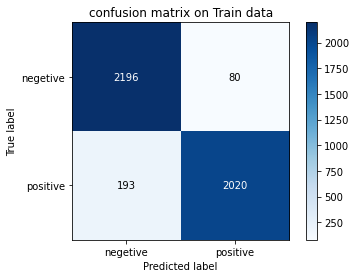

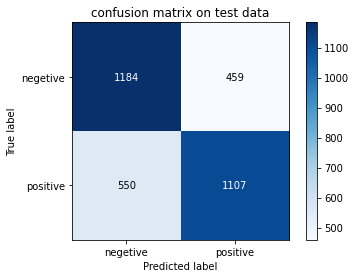

In [62]:
testing_rf(avgw2v_train,y_tr,avgw2v_test,y_test,optimal_estimator=400,optimal_depth=10)

# Tf-Idf W2V

In [63]:
#converting dictionary  word askey and idf as value

dictionary=dict(zip(tfidf_vec.get_feature_names(),list(tfidf_vec.idf_)))


In [64]:
def tfidfw2v(list_of_sent):

  tfidf_feat=tfidf_vec.get_feature_names()
  tfidf_sent_vectors=[]
  row=0
  for sent in list_of_sent:
    sent_vec=np.zeros(50)
    weight_sum=0
    for word in sent:
      if word in w2v_words and word in tfidf_feat:
        vec=w2v_model.wv[word]
        tf_idf=dictionary[word]*(sent.count(word)/len(sent))
        sent_vec=vec*tf_idf
        weight_sum=tf_idf
    
    if weight_sum!=0:
      sent_vec /=weight_sum
    tfidf_sent_vectors.append(sent_vec)

  row+=1
  print(len(tfidf_sent_vectors))
  print(len(tfidf_sent_vectors[0]))
  return np.array(tfidf_sent_vectors)

In [65]:
tfidfw2v_train=tfidfw2v(list_of_train_sent)

4489
50


In [66]:
tfidfw2v_cv=tfidfw2v(list_of_cv_sent)

2211
50


In [67]:
tfidfw2v_test=tfidfw2v(list_of_test_sent)

3300
50


## **Training Model for XGBoost**

In [ ]:
! pip3 install xgboost

In [69]:

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
# XGBoost classifier
def xgb_Classifier(X_train,X_cv,Y_train,Y_cv):
    pred_cv = []
    pred_train = []
    depths = [2, 3, 5, 8, 10, 20]
    estimators = [100, 200, 300, 400, 500]
    for i in depths:
        for j in estimators:
            clf = XGBClassifier(n_estimators=j, max_depth=i, scale_pos_weight=1, objective='binary:logistic')
            clf.fit(X_train,Y_train)
            probs = clf.predict_proba(X_cv)
            prob = clf.predict_proba(X_train)
            probs = probs[:,1]
            prob = prob[:,1]
            auc_score_cv = roc_auc_score(Y_cv,probs)
            auc_score_train = roc_auc_score(Y_train,prob)
            pred_cv.append(auc_score_cv)
            pred_train.append(auc_score_train)
    cmap=sns.light_palette("green")
    # representing heat map for auc score
    print("-"*30, "AUC Score for train data", "-"*30)
    pred_train = np.array(pred_train)
    pred_train = pred_train.reshape(len(depths),len(estimators))
    plt.figure(figsize=(10,5))
    sns.heatmap(pred_train,annot=True, cmap=cmap, fmt=".3f", xticklabels=estimators,yticklabels=depths)
    plt.xlabel('Estimators')
    plt.ylabel('Depths')
    plt.show()
    print("-"*30, "AUC Score for CV data", "-"*30)
    pred_cv = np.array(pred_cv)
    pred_cv = pred_cv.reshape(len(depths),len(estimators))
    plt.figure(figsize=(10,5))
    sns.heatmap(pred_cv, annot=True, cmap=cmap, fmt=".3f", xticklabels=estimators, yticklabels=depths)
    plt.xlabel('Estimators')
    plt.ylabel('Depths')
    plt.show()

In [70]:

import scikitplot.metrics as skplt
def testing1(X_train,Y_train,X_test,Y_test,optimal_depth,optimal_estimator):
    clf = XGBClassifier(n_estimators = optimal_estimator, max_depth = optimal_depth)#,class_weight='balanced')
    clf.fit(X_train,Y_train)
    prob = clf.predict_proba(X_test) 
    prob1 = clf.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    probs = prob[:, 1]
    probs1 = prob1[:,1]
    print("AUC Score for train data",roc_auc_score(Y_train,probs1))
    print("AUC Score for test data",roc_auc_score(Y_test,probs))
    # calculate roc curve
    fpr_train, tpr_train, thresholds = roc_curve(Y_train,probs1,pos_label='positive')
    fpr_test, tpr_test, thresholds = roc_curve(Y_test,probs,pos_label='positive')
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr_test, tpr_test, marker='.',color ='b',label='Test Data')
    plt.plot(fpr_train, tpr_train, marker='.',color= 'r',label='Train Data')
    plt.title("Line Plot of ROC Curve on Train Data and Test Data")
    plt.legend(loc='upper left')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show
    #plot confusion matrix
    pred=clf.predict(X_test)
    pred1=clf.predict(X_train)
   
    print("hamming loss for train data:",metrics.hamming_loss(Y_train,pred1))
    print("hamming loss for test data:",metrics.hamming_loss(Y_test,pred))
    print("Precision recall report for train data:\n",metrics.classification_report(Y_train, pred1))
    print("Precision recall report for test data:\n",metrics.classification_report(Y_test, pred))
    skplt.plot_confusion_matrix(Y_train,pred1,title='Confusion Matrix for Train Data')
    skplt.plot_confusion_matrix(Y_test,pred,title='Confusion Matrix for Test Data')

### **Traing XGboost on Bow**

------------------------------ AUC Score for train data ------------------------------


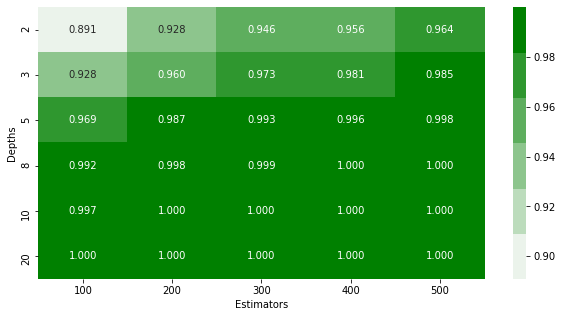

------------------------------ AUC Score for CV data ------------------------------


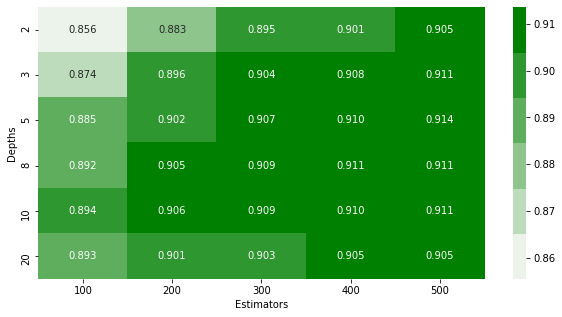

In [71]:
xgb_Classifier(bow_train,bow_cv,y_tr,y_cv)

AUC Score for train data 0.9866496267065439
AUC Score for test data 0.8956049163051969
hamming loss for train data: 0.05836489195811985
hamming loss for test data: 0.19
Precision recall report for train data:
               precision    recall  f1-score   support

    negetive       0.94      0.94      0.94      2276
    positive       0.94      0.94      0.94      2213

    accuracy                           0.94      4489
   macro avg       0.94      0.94      0.94      4489
weighted avg       0.94      0.94      0.94      4489

Precision recall report for test data:
               precision    recall  f1-score   support

    negetive       0.80      0.83      0.81      1643
    positive       0.82      0.79      0.81      1657

    accuracy                           0.81      3300
   macro avg       0.81      0.81      0.81      3300
weighted avg       0.81      0.81      0.81      3300



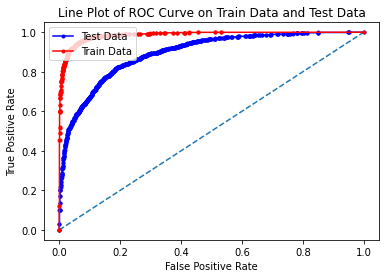

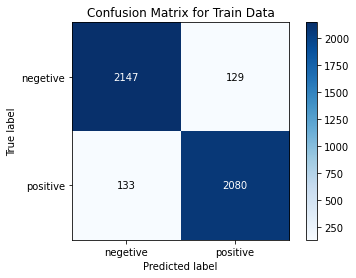

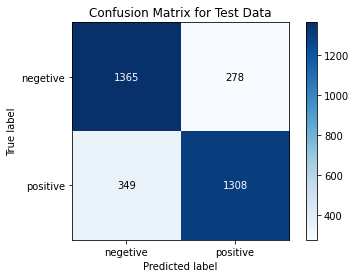

In [72]:
testing1(bow_train,y_tr,bow_test,y_test,optimal_depth=5,optimal_estimator=200)

------------------------------ AUC Score for train data ------------------------------


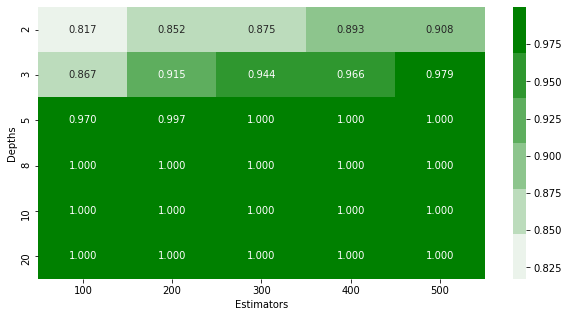

------------------------------ AUC Score for CV data ------------------------------


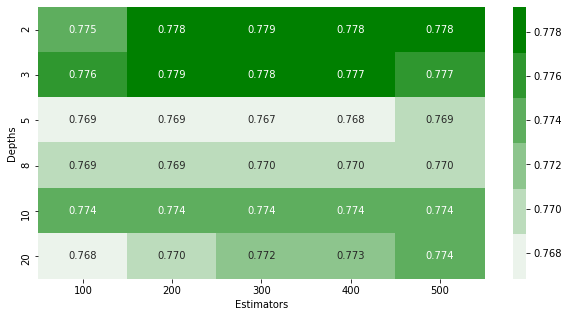

In [73]:
xgb_Classifier(avgw2v_train,avgw2v_cv,y_tr,y_cv)

AUC Score for train data 0.851637591258556
AUC Score for test data 0.7697574722189674
hamming loss for train data: 0.2312319002004901
hamming loss for test data: 0.3
Precision recall report for train data:
               precision    recall  f1-score   support

    negetive       0.76      0.79      0.77      2276
    positive       0.77      0.75      0.76      2213

    accuracy                           0.77      4489
   macro avg       0.77      0.77      0.77      4489
weighted avg       0.77      0.77      0.77      4489

Precision recall report for test data:
               precision    recall  f1-score   support

    negetive       0.69      0.73      0.71      1643
    positive       0.72      0.67      0.69      1657

    accuracy                           0.70      3300
   macro avg       0.70      0.70      0.70      3300
weighted avg       0.70      0.70      0.70      3300



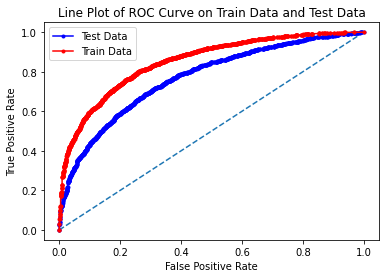

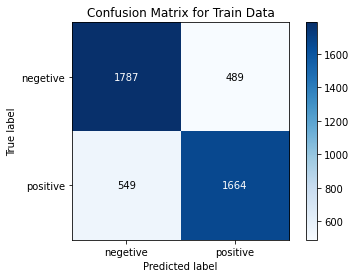

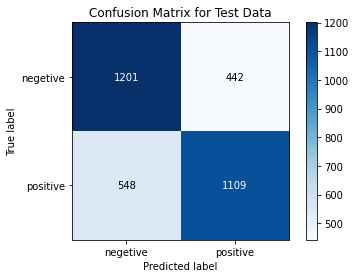

In [74]:
testing1(avgw2v_train,y_tr,avgw2v_test,y_test,optimal_depth=2,optimal_estimator=200)

------------------------------ AUC Score for train data ------------------------------


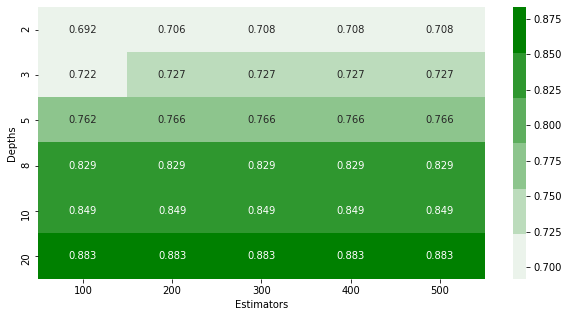

------------------------------ AUC Score for CV data ------------------------------


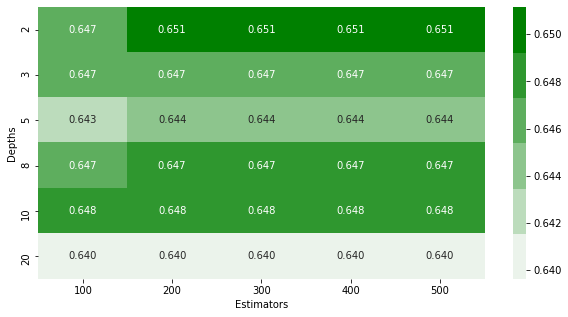

In [75]:
xgb_Classifier(tfidfw2v_train,tfidfw2v_cv,y_tr,y_cv)

AUC Score for train data 0.76604941482548
AUC Score for test data 0.6288067259980069
hamming loss for train data: 0.30630429939852977
hamming loss for test data: 0.4106060606060606
Precision recall report for train data:
               precision    recall  f1-score   support

    negetive       0.68      0.74      0.71      2276
    positive       0.71      0.64      0.67      2213

    accuracy                           0.69      4489
   macro avg       0.70      0.69      0.69      4489
weighted avg       0.69      0.69      0.69      4489

Precision recall report for test data:
               precision    recall  f1-score   support

    negetive       0.58      0.64      0.61      1643
    positive       0.60      0.54      0.57      1657

    accuracy                           0.59      3300
   macro avg       0.59      0.59      0.59      3300
weighted avg       0.59      0.59      0.59      3300



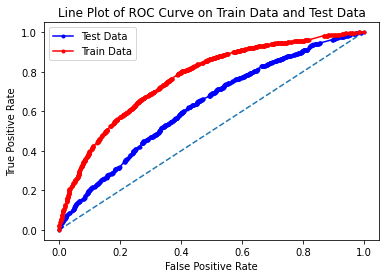

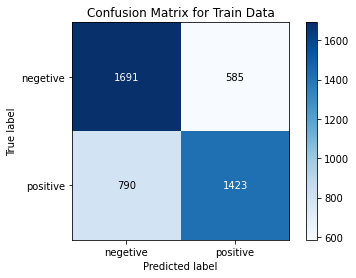

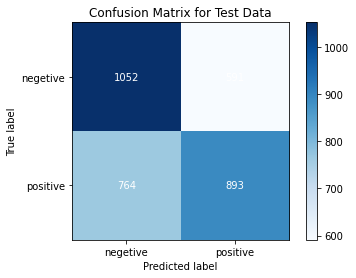

In [76]:
testing1(tfidfw2v_train,y_tr,tfidfw2v_test,y_test,optimal_depth=5,optimal_estimator=500)

## **Conclusions**

In [78]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer","Model","Best Hyper Parameter(Depth)","Best Hyper parameter(n_estimator)","Test Auc Score"]
x.add_row(["BoW","Random Forest",20,200,88.4])
x.add_row(["Tf-Idf","Random Forest",20,200,86.35])
x.add_row(["Avg-W2V","Random Forest",10,400,86.12])
x.add_row(["TfIdf-W2V","Random Forest",5,100,83.29])
x.add_row(["BoW","XGBoost",5,200,89.8])
x.add_row(["Tf-Idf","XGBoost",3,400,92.09])
x.add_row(["Avg-W2V","XGBoost",2,200,85.30])
x.add_row(["TfIdf-W2V","XGBoost",5,500,87.7])
print(x)

+------------+---------------+-----------------------------+-----------------------------------+----------------+
| Vectorizer |     Model     | Best Hyper Parameter(Depth) | Best Hyper parameter(n_estimator) | Test Auc Score |
+------------+---------------+-----------------------------+-----------------------------------+----------------+
|    BoW     | Random Forest |              20             |                200                |      88.4      |
|   Tf-Idf   | Random Forest |              20             |                200                |     86.35      |
|  Avg-W2V   | Random Forest |              10             |                400                |     86.12      |
| TfIdf-W2V  | Random Forest |              5              |                100                |     83.29      |
|    BoW     |    XGBoost    |              5              |                200                |      89.8      |
|   Tf-Idf   |    XGBoost    |              3              |                400         